## **MEthodology**

Collaborative Filtering (CF) is a popular recommendation technique that makes use of user-item interactions to predict preferences. It can be divided into two main types: **Memory-Based Collaborative Filtering** and **Model-Based Collaborative Filtering**. Below, we describe the general methodology, focusing on the **Matrix Factorization** technique used in frameworks like ALS (Alternating Least Squares).


Collaborative Filtering predicts a user's preference for an item based on their past interactions and similar interactions from other users.


### 1. **Matrix Factorization Approach**

#### **User-Item Interaction Matrix**
Let $ R $ represent the user-item interaction matrix:
$
R \in \mathbb{R}^{m \times n}
$
Where:
- $ m $ is the number of users.
- $ n $ is the number of items.
- $ r_{ui} $ is the observed rating of user $ u $ for item $ i $, or 0 if not rated.


#### **Factorization**
Matrix Factorization approximates $ R $ as the product of two lower-dimensional matrices:
$
R \approx P Q^\top
$
Where:
- $ P \in \mathbb{R}^{m \times k} $: Latent feature matrix for users.
- $ Q \in \mathbb{R}^{n \times k} $: Latent feature matrix for items.
- $ k $: Number of latent factors (dimensionality of the embeddings).

The predicted rating $ \hat{r}_{ui} $ for user $ u $ and item $ i $ is:
$
\hat{r}_{ui} = \mathbf{p}_u^\top \mathbf{q}_i
$
Where:
- $ \mathbf{p}_u $ is the $ u $-th row of $ P $.
- $ \mathbf{q}_i $ is the $ i $-th row of $ Q $.


#### **Optimization Objective**
To learn the latent factors, minimize the regularized loss function:
$
\mathcal{L} = \sum_{(u, i) \in \mathcal{K}} \left( r_{ui} - \mathbf{p}_u^\top \mathbf{q}_i \right)^2 + \lambda \left( \| \mathbf{p}_u \|^2 + \| \mathbf{q}_i \|^2 \right)
$
Where:
- $ \mathcal{K} $: Set of observed ratings.
- $ \lambda $: Regularization parameter to prevent overfitting.


### 2. **Alternating Least Squares (ALS)**

ALS is a popular algorithm for solving the Matrix Factorization problem efficiently.

#### **Core Idea**
- Optimize $ P $ while keeping $ Q $ fixed, and vice versa.
- This alternation reduces the problem to a series of convex optimization subproblems.

#### **Update Rules**
1. Fix $ Q $, update $ P $:
   $
   \mathbf{p}_u = \arg\min_{\mathbf{p}_u} \sum_{i \in \mathcal{I}_u} \left( r_{ui} - \mathbf{p}_u^\top \mathbf{q}_i \right)^2 + \lambda \| \mathbf{p}_u \|^2
   $
   Where $ \mathcal{I}_u $ is the set of items rated by user $ u $.

   Solution:
   $
   \mathbf{p}_u = \left( \sum_{i \in \mathcal{I}_u} \mathbf{q}_i \mathbf{q}_i^\top + \lambda I \right)^{-1} \sum_{i \in \mathcal{I}_u} r_{ui} \mathbf{q}_i
   $

2. Fix $ P $, update $ Q $:
   $
   \mathbf{q}_i = \arg\min_{\mathbf{q}_i} \sum_{u \in \mathcal{U}_i} \left( r_{ui} - \mathbf{p}_u^\top \mathbf{q}_i \right)^2 + \lambda \| \mathbf{q}_i \|^2
   $
   Where $ \mathcal{U}_i $ is the set of users who rated item $ i $.

   Solution:
   $
   \mathbf{q}_i = \left( \sum_{u \in \mathcal{U}_i} \mathbf{p}_u \mathbf{p}_u^\top + \lambda I \right)^{-1} \sum_{u \in \mathcal{U}_i} r_{ui} \mathbf{p}_u
   $

#### **Stopping Criteria**
Repeat updates until convergence (e.g., until the change in the loss function or $ P, Q $ becomes negligible).


### 3. **Handling Implicit Feedback**

For implicit feedback data (e.g., clicks, views):
- Use binary preference data $ c_{ui} \in \{0, 1\} $ to represent whether an interaction exists.
- Weight interactions by confidence:
$
\mathcal{L} = \sum_{u, i} c_{ui} \left( r_{ui} - \mathbf{p}_u^\top \mathbf{q}_i \right)^2 + \lambda \left( \| \mathbf{p}_u \|^2 + \| \mathbf{q}_i \|^2 \right)
$
Where $ c_{ui} $ is a confidence score, often defined as $ c_{ui} = 1 + \alpha r_{ui} $, where $ \alpha > 0 $.


### 4. **Evaluation Metrics**

#### **Root Mean Squared Error (RMSE)**
Measure of the average deviation between predicted and actual ratings:
$
\text{RMSE} = \sqrt{\frac{1}{|\mathcal{K}|} \sum_{(u, i) \in \mathcal{K}} \left( r_{ui} - \hat{r}_{ui} \right)^2}
$

#### **Precision@K and Recall@K**
For top-$ K $ recommendations:
-
$
\text{Precision@K} = \frac{\text{Relevant Items Recommended at K}}{\text{Total Items Recommended at K}}
$

-
$
\text{Recall@K} = \frac{\text{Relevant Items Recommended at K}}{\text{Total Relevant Items}}
$


### 5. **Hyperparameter Tuning**
Key hyperparameters for ALS include:
- **Rank $(k)$**: Number of latent factors.
- **Regularization Parameter $(\lambda)$**: Controls overfitting.
- **Number of Iterations**: Controls convergence.


### Summary
Collaborative Filtering with ALS provides an efficient and scalable way to learn latent factors for recommendations. It is particularly well-suited for large-scale systems with sparse user-item interaction data. The methodology is grounded in matrix factorization, regularized optimization, and iterative refinement through alternating updates.

### Install libraries

In [ ]:
!pip install pandas numpy pyspark datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


### Loading and preprocessing the dataset

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the raw review data
print("Loading raw reviews...")
raw_reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_review_All_Beauty", trust_remote_code=True)

## Inspect the structure of the raw reviews
print("Raw reviews structure:")
print(raw_reviews)

## Load the metadata
print("Loading metadata...")
metadata = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_meta_All_Beauty", trust_remote_code=True)

# Inspect the structure of metadata
print("Metadata structure:")
print(metadata)

## View sample of raw reviews
print("Sample raw reviews:")
print(raw_reviews['full'].to_pandas().head())

# View a sample of metadata
print("Sample metadata:")
print(metadata['full'].to_pandas().head())

Loading raw reviews...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Raw reviews structure:
DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 701528
    })
})
Loading metadata...


meta_All_Beauty.jsonl:   0%|          | 0.00/213M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

Metadata structure:
DatasetDict({
    full: Dataset({
        features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
        num_rows: 112590
    })
})
Sample raw reviews:
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                          

In [ ]:
import numpy as np

# Load the raw review data and metadata
print("Loading datasets...")
raw_reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_review_All_Beauty",  trust_remote_code=True)
metadata = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_meta_All_Beauty", trust_remote_code=True)

##Convert the raw reviews and metadata to a pandas dataframe
print("Converting to Pandas DataFrame...")
raw_reviews_df = raw_reviews['full'].to_pandas()
metadata_df = metadata['full'].to_pandas()
# Inspect structure of the columns
print("Raw Reviews Columns:", raw_reviews_df.columns)
print("Metadata Columns:",  metadata_df.columns)

# Select necessary fields from raw reviews
selected_reviews = raw_reviews_df[['user_id', 'parent_asin', 'rating', 'text', 'timestamp']]
# Select necessary fields from metadata
selected_metadata = metadata_df[['parent_asin' , 'main_category', 'title', 'average_rating', 'rating_number' , 'price', 'categories']]

## Merge raw reviews with metadata on 'parent_asin'
print("Merging datasets...")
merged_data = pd.merge(selected_reviews, selected_metadata, on='parent_asin', how='inner')

# Handle missing values
print("Handling missing values...")
merged_data = merged_data.dropna(subset=['user_id', 'parent_asin', 'rating', 'timestamp', 'main_category'])

# Convert price to numeric
print("Converting 'price' to numeric...")
merged_data['price'] = pd.to_numeric(merged_data['price'], errors='coerce')

##Fill missing prices with median
print("Filling missing prices...")
median_price = merged_data['price'].median()  # Compute median of valid numeric values
merged_data['price'] = merged_data['price'].fillna(median_price)

# Convert timestamp to datetime
print("Converting timestamp to datetime...")
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'], unit='ms')

print("Combining title and text...")
merged_data['review_text'] = merged_data['text'].fillna('') + " " + merged_data['title'].fillna('')
## Dropping unnecessary columns
final_data = merged_data[['user_id', 'parent_asin', 'rating', 'timestamp', 'review_text', 'main_category', 'average_rating', 'price']]

# Save preprocessed data
output_file = "preprocessed_amazon_reviews_all_beauty.csv"
print(f"Saving preprocessed data to {output_file}...")
final_data.to_csv(output_file, index=False)
print("Preprocessing complete.")

Loading datasets...
Converting to Pandas DataFrame...
Raw Reviews Columns: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')
Metadata Columns: Index(['main_category', 'title', 'average_rating', 'rating_number', 'features',
       'description', 'price', 'images', 'videos', 'store', 'categories',
       'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
      dtype='object')
Merging datasets...
Handling missing values...
Converting 'price' to numeric...
Filling missing prices...
Converting timestamp to datetime...
Combining title and text...
Saving preprocessed data to preprocessed_amazon_reviews_all_beauty.csv...
Preprocessing complete.


### Splitting the dataset into train and test sets

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, when
from pyspark.ml.recommendation import ALS
from pyspark.sql.types import IntegerType

## Initialize a spark session
print("Initializing PySpark...")
spark = SparkSession.builder.appName("AmazonRecommender").getOrCreate()

# Load the preprocessed data into a pyspark dataframe
print("Loading data into PySpark...")
file_path = "/content/preprocessed_amazon_reviews_all_beauty.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)
print("Data preview:")
data.show(5)

## Converting to appropriate types
data = data.withColumn("rating", col("rating").cast(IntegerType()))
data = data.withColumn("price", col("price").cast("float"))

## Splitting data into training and test sets
print("Splitting data...")
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)
train_data.write.csv("train_data_pyspark.csv", header=True, mode="overwrite")
test_data.write.csv("test_data_pyspark.csv", header=True, mode="overwrite")

print("Data preparation complete.")

Initializing PySpark...
Loading data into PySpark...
Data preview:
+--------------------+-----------+------+--------------------+--------------------+-------------+--------------+-----+
|             user_id|parent_asin|rating|           timestamp|         review_text|main_category|average_rating|price|
+--------------------+-----------+------+--------------------+--------------------+-------------+--------------+-----+
|AGKHLEW2SOWHNMFQI...| B00YQ6X8EO|   5.0|2020-05-05 14:08:...|This spray is rea...|   All Beauty|           4.3|15.99|
|AGKHLEW2SOWHNMFQI...| B081TJ8YS3|   4.0|2020-05-04 18:10:...|This product does...|   All Beauty|           4.0|15.99|
|AE74DYR3QUGVPZJ3P...| B097R46CSY|   5.0|2020-05-16 21:41:...|Smells good, feel...|   All Beauty|           4.4|21.98|
|AFQLNQNQYFWQZPJQZ...| B09JS339BZ|   1.0|2022-01-28 18:13:...|Felt synthetic mu...|   All Beauty|           1.0|15.99|
|AFQLNQNQYFWQZPJQZ...| B08BZ63GMJ|   5.0|2020-12-30 10:02:...|Love it Yinhua El...|   All Beauty|   

In [ ]:
import os

# Define the paths for the uploaded CSV files
train_data_dir = '/content/train_data_pyspark.csv'
test_data_dir = '/content/test_data_pyspark.csv'

## List contents of the directories
train_files = os.listdir(train_data_dir)
test_files = os.listdir(test_data_dir)

## Print the contents of the directories
print("Contents of train_data_pyspark.csv directory:")
print(train_files)

print("\nContents of test_data_pyspark.csv directory:")
print(test_files)

Contents of train_data_pyspark.csv directory:
['_SUCCESS', '.part-00001-d0991c86-142d-4700-ba5a-f2bd0a1a34f9-c000.csv.crc', 'part-00001-d0991c86-142d-4700-ba5a-f2bd0a1a34f9-c000.csv', '.part-00000-d0991c86-142d-4700-ba5a-f2bd0a1a34f9-c000.csv.crc', '._SUCCESS.crc', 'part-00000-d0991c86-142d-4700-ba5a-f2bd0a1a34f9-c000.csv']

Contents of test_data_pyspark.csv directory:
['_SUCCESS', 'part-00001-2f53666b-a900-4b38-b298-6c4095e8afe3-c000.csv', '.part-00000-2f53666b-a900-4b38-b298-6c4095e8afe3-c000.csv.crc', 'part-00000-2f53666b-a900-4b38-b298-6c4095e8afe3-c000.csv', '.part-00001-2f53666b-a900-4b38-b298-6c4095e8afe3-c000.csv.crc', '._SUCCESS.crc']


In [ ]:
# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# Change the directory
os.chdir("/content/test_data_pyspark.csv")

##List all files and directories in the current directory
filenames = os.listdir()
for i in filenames:
  if "part-00000" in i and ".csv" in i and ".crc" not in i:
      test_file_path_1 = '/content/test_data_pyspark.csv/'+i
      print(test_file_path_1)
  if "part-00001" in i and ".csv" in i and ".crc" not in i:
      test_file_path_2 = '/content/test_data_pyspark.csv/'+i
      print(test_file_path_2)


## Changing the directory
os.chdir("/content/train_data_pyspark.csv")

# List all files and directories in the current directory
filenames = os.listdir()

for i in filenames:
  if "part-00000" in i and ".csv" in i and ".crc" not in i:
      train_file_path_1 = '/content/train_data_pyspark.csv/'+i
      print(train_file_path_1)
  if "part-00001" in i and ".csv" in i and ".crc" not in i:
      train_file_path_2 = '/content/train_data_pyspark.csv/'+i
      print(train_file_path_2)

os.chdir("/content")

Current working directory: /content
/content/test_data_pyspark.csv/part-00001-2f53666b-a900-4b38-b298-6c4095e8afe3-c000.csv
/content/test_data_pyspark.csv/part-00000-2f53666b-a900-4b38-b298-6c4095e8afe3-c000.csv
/content/train_data_pyspark.csv/part-00001-d0991c86-142d-4700-ba5a-f2bd0a1a34f9-c000.csv
/content/train_data_pyspark.csv/part-00000-d0991c86-142d-4700-ba5a-f2bd0a1a34f9-c000.csv


In [ ]:
train_data = pd.concat([pd.read_csv(train_file_path_1, on_bad_lines='skip'),
                        pd.read_csv(train_file_path_2, on_bad_lines='skip')], ignore_index=True)

test_data = pd.concat([pd.read_csv(test_file_path_1, on_bad_lines='skip'),
                       pd.read_csv(test_file_path_2, on_bad_lines='skip')], ignore_index=True)

print("Train data preview:")
print(train_data.head())

print("\nTest data preview:")
print(test_data.head())

<ipython-input-7-74ddc4c53d54>:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(train_file_path_2, on_bad_lines='skip')], ignore_index=True)


Train data preview:
                        user_id parent_asin rating                timestamp  \
0  AE222BBOVZIF42YOOPNBXL4UUMYA  B013HR1A92      5  2016-03-10 00:27:52.000   
1  AE222Y4WTST6BUZ4J5Y2H6QMBITQ  B00012FPSO      4  2013-06-24 21:11:42.000   
2  AE223UUOHC3V2XF4JOTTDDSBODSQ  B06Y5Y3R5L      1  2018-05-31 19:14:53.756   
3  AE224LWIR4ZDJLRKORFHMJGABP6Q  B000NMF45G      5  2011-01-11 13:45:27.000   
4  AE224QB4K4PDIZ6FVU6MGVFEYSPQ  B01LBESKBO      3  2018-10-06 20:19:13.934   

                                         review_text main_category  \
0  Great product....excellent price for good resu...    All Beauty   
1  The cleaning unit does a good job of cleaning ...    All Beauty   
2  junk Black Charcoal Peel Off Face Mask / Japan...    All Beauty   
3  I was paying 50$ for one filter from the manuf...    All Beauty   
4  A bottle was open. Cosmetic Art 30-Piece Nail ...    All Beauty   

  average_rating  price  
0            3.9  15.99  
1            4.5  15.99  
2     

<ipython-input-7-74ddc4c53d54>:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(test_file_path_2, on_bad_lines='skip')], ignore_index=True)


In [ ]:
# Checking for missing values
print("Train Data - Missing Values:")
print(train_data.isnull().sum())

print("\nTest Data - Missing Values:")
print(test_data.isnull().sum())

# Check the data types of each column
print("\nTrain Data - Data Types:")
print(train_data.dtypes)

print("\nTest Data - Data Types:")
print(test_data.dtypes)

# Checking for duplicate rows
print("\nTrain Data - Duplicate Rows:")
print(train_data.duplicated().sum())

print("\nTest Data - Duplicate Rows:")
print(test_data.duplicated().sum())

Train Data - Missing Values:
user_id                0
parent_asin            0
rating                 0
timestamp              0
review_text           26
main_category         54
average_rating      1320
price             281596
dtype: int64

Test Data - Missing Values:
user_id             0
parent_asin         0
rating              0
timestamp           0
review_text         0
main_category      13
average_rating     17
price             629
dtype: int64

Train Data - Data Types:
user_id            object
parent_asin        object
rating             object
timestamp          object
review_text        object
main_category      object
average_rating     object
price             float64
dtype: object

Test Data - Data Types:
user_id            object
parent_asin        object
rating             object
timestamp          object
review_text        object
main_category      object
average_rating     object
price             float64
dtype: object

Train Data - Duplicate Rows:
4611

Test Data

In [ ]:
# Alternatively, drop rows with missing values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
print("Column types before scaling:")
print(train_data.dtypes)

print("Columns in the data:")
print(train_data.columns)

Column types before scaling:
user_id            object
parent_asin        object
rating             object
timestamp          object
review_text        object
main_category      object
average_rating     object
price             float64
dtype: object
Columns in the data:
Index(['user_id', 'parent_asin', 'rating', 'timestamp', 'review_text',
       'main_category', 'average_rating', 'price'],
      dtype='object')


In [ ]:
# Print datatypes of each column
print("Column types before scaling:")
print(test_data.dtypes)

# Print the columns in the data
print("Columns in the data:")
print(test_data.columns)

Column types before scaling:
user_id            object
parent_asin        object
rating             object
timestamp          object
review_text        object
main_category      object
average_rating     object
price             float64
dtype: object
Columns in the data:
Index(['user_id', 'parent_asin', 'rating', 'timestamp', 'review_text',
       'main_category', 'average_rating', 'price'],
      dtype='object')


In [ ]:
# Print datatypes of each column
print("Column types before scaling:")
print(train_data.dtypes)

# Print the columns in the data
print("Columns in the data:")
print(train_data.columns)

Column types before scaling:
user_id            object
parent_asin        object
rating             object
timestamp          object
review_text        object
main_category      object
average_rating     object
price             float64
dtype: object
Columns in the data:
Index(['user_id', 'parent_asin', 'rating', 'timestamp', 'review_text',
       'main_category', 'average_rating', 'price'],
      dtype='object')


### Label Encoding for ALS Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

train_data['parent_asin'] = train_data['parent_asin'].astype(str)
test_data['parent_asin'] = test_data['parent_asin'].astype(str)

# Encoding 'user_id' and 'parent_asin' columns
##Combine both train and test data to ensure LabelEncoder sees all unique values
combined_user_data = pd.concat([train_data['user_id'], test_data['user_id']], axis=0)
combined_item_data = pd.concat([train_data['parent_asin'], test_data['parent_asin']], axis=0)

## Fit label encoder on the combined data
label_encoder_user = LabelEncoder()
label_encoder_user.fit(combined_user_data)

label_encoder_item = LabelEncoder()
label_encoder_item.fit(combined_item_data)

## Transform train and test data separately
train_data['user_id_encoded'] = label_encoder_user.transform(train_data['user_id'])
test_data['user_id_encoded'] = label_encoder_user.transform(test_data['user_id'])

train_data['parent_asin_encoded'] = label_encoder_item.transform(train_data['parent_asin'])
test_data['parent_asin_encoded'] = label_encoder_item.transform(test_data['parent_asin'])

#Drop non-numeric columns ('timestamp', 'review_text', 'main_category') before scaling
columns_to_drop = ['timestamp', 'review_text', 'main_category']
train_data = train_data.drop(columns=[col for col in columns_to_drop if col in train_data.columns])
test_data = test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns])

# Convert 'average_rating' and 'rating' to numeric and handle errors
train_data['average_rating'] = pd.to_numeric(train_data['average_rating'], errors='coerce')
test_data['average_rating'] = pd.to_numeric(test_data['average_rating'], errors='coerce')

train_data['rating'] = pd.to_numeric(train_data['rating'], errors='coerce')
test_data['rating'] = pd.to_numeric(test_data['rating'], errors='coerce')

## Drop rows where any numerical columns have NaN
numerical_columns = ['rating', 'average_rating', 'price']
train_data = train_data.dropna(subset=numerical_columns)
test_data = test_data.dropna(subset=numerical_columns)

#Scaling numerical features
scaler = StandardScaler()
train_data.loc[:, numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data.loc[:, numerical_columns] = scaler.transform(test_data[numerical_columns])

print("\nTrain Data - After Encoding and Scaling:")
print(train_data.head())

print("\nTest Data - After Encoding and Scaling:")
print(test_data.head())


Train Data - After Encoding and Scaling:
                        user_id parent_asin    rating  average_rating  \
0  AE222BBOVZIF42YOOPNBXL4UUMYA  B013HR1A92  0.676357       -0.003402   
1  AE222Y4WTST6BUZ4J5Y2H6QMBITQ  B00012FPSO -0.023249       -0.003297   
2  AE223UUOHC3V2XF4JOTTDDSBODSQ  B06Y5Y3R5L -2.122066       -0.003437   
3  AE224LWIR4ZDJLRKORFHMJGABP6Q  B000NMF45G  0.676357       -0.003297   
4  AE224QB4K4PDIZ6FVU6MGVFEYSPQ  B01LBESKBO -0.722854       -0.003402   

      price  user_id_encoded  parent_asin_encoded  
0 -0.003544                0                15600  
1 -0.003544                1                  132  
2 -0.003544                4                29980  
3 -0.003544                7                  735  
4 -0.003544                8                25111  

Test Data - After Encoding and Scaling:
                        user_id parent_asin    rating  average_rating  \
0  AE223FOBUQAUOSGVCDRABQGKGVSQ  B0006NXBT8  0.676357       -0.003262   
1  AE224QB4K4PDIZ6FV

<ipython-input-13-59da1f05b8af>:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.6763571  -0.72285426  0.6763571  ...  0.6763571  -2.12206561
 -2.12206561]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[:, numerical_columns] = scaler.transform(test_data[numerical_columns])


### Model Training

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc

## Initialize the Spark session
spark = SparkSession.builder.appName("CollaborativeFiltering").getOrCreate()

# Prepare the data for ALS
train_data = spark.createDataFrame(train_data)
test_data = spark.createDataFrame(test_data)

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator


## Define the ALS model
als = ALS(userCol="user_id_encoded", itemCol="parent_asin_encoded", ratingCol="rating", nonnegative=True, implicitPrefs=False, coldStartStrategy="drop")


param_grid = ParamGridBuilder() \
    .addGrid(als.rank, [10, 20]) \
    .addGrid(als.maxIter, [10]) \
    .addGrid(als.regParam, [0.1]) \
    .build()

##Define the evaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
# Perform cross validation
crossval = CrossValidator(estimator=als,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)  # 5-fold cross-validation

## Fit the CrossValidator model on the training data
cv_model = crossval.fit(train_data)

#Get the best model from cross-validaion
best_model = cv_model.bestModel

# Make predictions on the test data using the best model
predictions = best_model.transform(test_data)
##Evaluate the model with RMSE
rmse = evaluator.evaluate(predictions)
print(f"RMSE: {rmse}")

#Get top 10 recommendations for the first 10 users
user_recommendations = best_model.recommendForAllUsers(10)
user_recommendations = user_recommendations.limit(10)

##Show some of the top recommendations for the first 10 users
user_recommendations.show(truncate=False)

best_model.save("/content/als_model")


RMSE: 0.9017283068704656
+---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|user_id_encoded|recommendations                                                                                                                                                                                                |
+---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|1              |[{50788, 0.0}, {50778, 0.0}, {50768, 0.0}, {50748, 0.0}, {50738, 0.0}, {50728, 0.0}, {50718, 0.0}, {50708, 0.0}, {50698, 0.0}, {50678, 0.0}]                                                                   |
|12             |[{50788, 0.0}, {50778, 0.0}, {50768, 0.0}, {50748, 0.0

In [ ]:
spark = SparkSession.builder.appName("RecommendationExample").getOrCreate()

## Create user-item pairs from the test data
user_item_pairs = test_data[['user_id_encoded', 'parent_asin_encoded']]
user_item_pairs_list = user_item_pairs.collect()
user_item_pairs_list = [(row['user_id_encoded'], row['parent_asin_encoded']) for row in user_item_pairs_list]
user_item_pairs_spark = spark.createDataFrame(user_item_pairs_list, ['user_id_encoded', 'parent_asin_encoded'])

# Get predictions using the ALS model's `transform` method
predictions = best_model.transform(user_item_pairs_spark)

# Sort predictions by predicted rating (descending) and select the top-k recommendations
k = 10
predictions_sorted = predictions.orderBy(desc('prediction')).limit(k)
#Collect the predictions and store them in a list
top_k_recommendations = []
for row in predictions_sorted.collect():
    top_k_recommendations.append({
        'user_id': row['user_id_encoded'],
        'parent_asin': row['parent_asin_encoded'],
        'predicted_rating': row['prediction']
    })

# Convert the recommendations list to a pandas DataFrame
recommendations_df = pd.DataFrame(top_k_recommendations)
print(recommendations_df.head())


   user_id  parent_asin  predicted_rating
0   269152        18037          0.618611
1    95488        19751          0.607089
2   258912        20875          0.601400
3   169428         7761          0.599505
4   328739         7721          0.598191


In [ ]:
recommendations_df = recommendations_df.sort_values(by=['user_id', 'predicted_rating'], ascending=[True, False])

### Computing Precision@10 and Recall@10

In [ ]:
from pyspark.sql import functions as F

##Create a mapping of relevant items (parent_asin_encoded) for each user_id_encoded
user_relevant_items = test_data.groupby('user_id_encoded').agg(F.collect_set('parent_asin_encoded').alias('relevant_items'))
user_relevant_items_pd = user_relevant_items.toPandas()

precision_at_k = []
recall_at_k = []

# Iterate through the top-k recommendations
for user_id, group in recommendations_df.groupby('user_id'):
    ## Get the true relevant items for this user from the user_relevant_items DataFrame
    relevant_items = user_relevant_items_pd[user_relevant_items_pd['user_id_encoded'] == user_id]['relevant_items'].values
    if len(relevant_items) == 0:
        continue
    relevant_items = relevant_items[0]
    recommended_items = set(group['parent_asin'].head(k))  # Top-k items

    # Calculate Precision@10
    relevant_items_set = set(relevant_items)
    recommended_items_set = set(recommended_items)

    # Find the intersection of relevant and recommended items
    relevant_recommended_items = relevant_items_set.intersection(recommended_items_set)
    precision_at_k.append(len(relevant_recommended_items) / k)
    ##Calculate Recall@10
    recall_at_k.append(len(relevant_recommended_items) / len(relevant_items_set))
# Compute average Precision@10 and Recall@10
average_precision_at_10 = np.mean(precision_at_k)
average_recall_at_10 = np.mean(recall_at_k)

print(f"Average Precision@10: {average_precision_at_10:.4f}")
print(f"Average Recall@10: {average_recall_at_10:.4f}")


Average Precision@10: 0.1000
Average Recall@10: 0.9500


### Visualizing the output

In [ ]:
#Load the metadata dataset
meta_data = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
print("Keys in Metadata:", meta_data[0].keys())
meta_dict = {item['parent_asin']: item.get('title', "Unknown Title") for item in meta_data}

#Reverse mapping from encoded IDs to parent_asin
label_encoder_item = LabelEncoder()

# Fit encoder to all the unique ASIN values
all_asins = [item['parent_asin'] for item in meta_data]
label_encoder_item.fit(all_asins)  # Fit encoder to all the unique ASIN values
##Create reverse mapping
reverse_mapping = {encoded_id: parent_asin for encoded_id, parent_asin in zip(range(len(label_encoder_item.classes_)), label_encoder_item.classes_)}

# Decode recommendations
try:
    # Collect spark recommendations into local memory
    recommendations = user_recommendations.collect()
    print("Recommendations Collected.")
    #Inspect a sample recommendation structure
    print("Sample Recommendation:", recommendations[0])

    # Process each recommendation
    for row in recommendations:
        user_id = row['user_id_encoded']
        recs = row['recommendations']
        print(f"Recommendations for User {user_id}:")
        for rec in recs:
            item_id_encoded = rec['parent_asin_encoded']
            predicted_score = rec['rating']

            parent_asin = reverse_mapping.get(item_id_encoded, "Unknown ASIN")
            if parent_asin == "Unknown ASIN":
                print(f"  - WARNING: Unable to map Encoded Item ID: {item_id_encoded} to parent_asin.")
            item_title = meta_dict.get(parent_asin, "Title Not Found")
            print(f"  - Encoded Item ID: {item_id_encoded}, ASIN: {parent_asin}, Title: {item_title}, Predicted Score: {predicted_score}")
except Exception as e:
    print(f"Error while decoding recommendations: {e}")

README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Keys in Metadata: dict_keys(['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'])
Recommendations Collected.
Sample Recommendation: Row(user_id_encoded=1, recommendations=[Row(parent_asin_encoded=50788, rating=0.0), Row(parent_asin_encoded=50778, rating=0.0), Row(parent_asin_encoded=50768, rating=0.0), Row(parent_asin_encoded=50748, rating=0.0), Row(parent_asin_encoded=50738, rating=0.0), Row(parent_asin_encoded=50728, rating=0.0), Row(parent_asin_encoded=50718, rating=0.0), Row(parent_asin_encoded=50708, rating=0.0), Row(parent_asin_encoded=50698, rating=0.0), Row(parent_asin_encoded=50678, rating=0.0)])
Recommendations for User 1:
  - Encoded Item ID: 50788, ASIN: B07DQF1JTW, Title: Jumbo Braiding Hair Ombre braids 3pcs Black and Pink hair extensions tone clolor (3pcs, T1B/Pink), Predicted Score: 0.0
  - Encoded Item ID: 50778, ASI

<ipython-input-26-534b141b35c0>:55: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  plt.tight_layout()
<ipython-input-26-534b141b35c0>:55: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  plt.tight_layout()
<ipython-input-26-534b141b35c0>:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


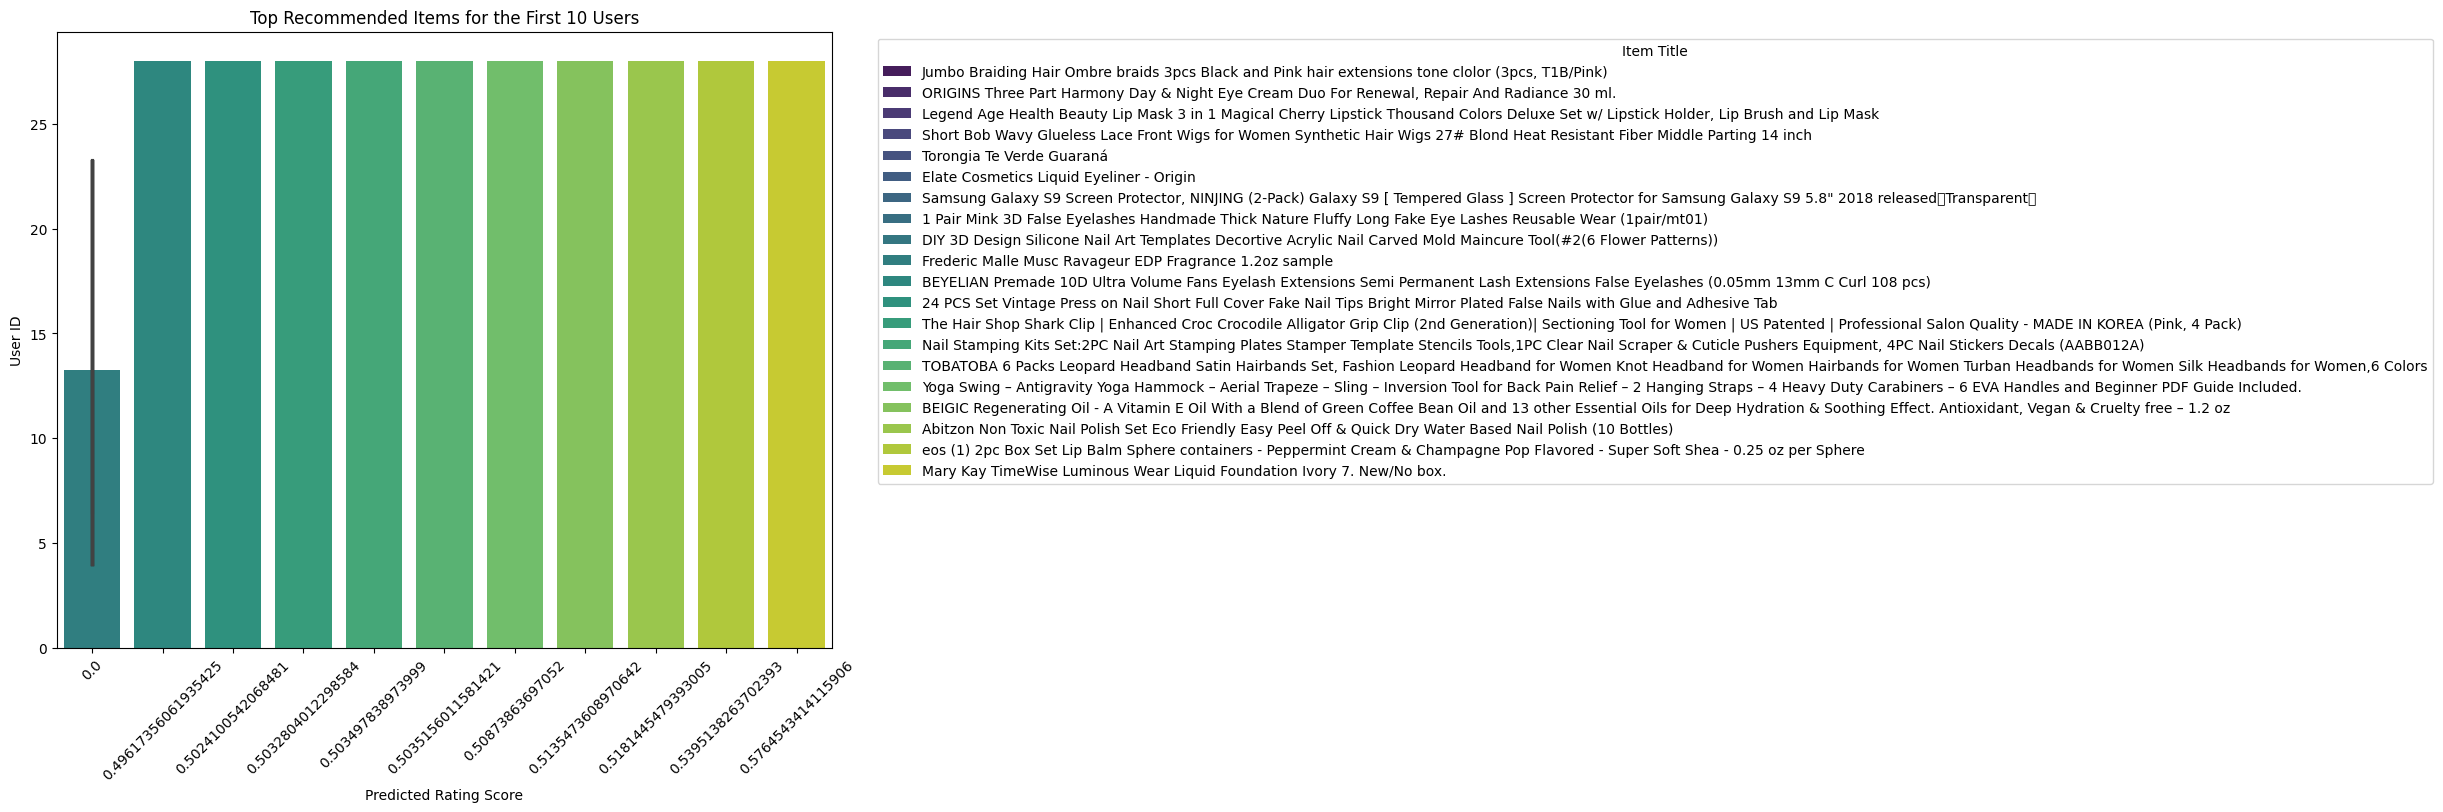

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#Prepare the data
user_ids = []
item_titles = []
predicted_scores = []

# Collect recommendations for the first 10 users
for row in recommendations[:5]:
    user_id = row['user_id_encoded']
    recs = row['recommendations']
    for rec in recs:
        item_id_encoded = rec['parent_asin_encoded']
        predicted_score = rec['rating']
        parent_asin = reverse_mapping.get(item_id_encoded, "Unknown ASIN")
        item_title = meta_dict.get(parent_asin, "Title Not Found")
        user_ids.append(user_id)
        item_titles.append(item_title)
        predicted_scores.append(predicted_score)

df = pd.DataFrame({
    'User ID': user_ids,
    'Item Title': item_titles,
    'Predicted Score': predicted_scores})

plt.figure(figsize=(10, 8))

sns.barplot(
    data=df,
    y='User ID',
    x='Predicted Score',  # Set predicted score on the x-axis
    hue='Item Title',  # Different items represented by color
    dodge=False,  # Items for each user stacked together
    palette='viridis'
)

plt.title('Top Recommended Items for the First 10 Users')
plt.xlabel('Predicted Rating Score')
plt.ylabel('User ID')
plt.legend(title='Item Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
